In [4]:
# import dependencies
import pandas as pd
import numpy as np
import tweepy
import json
import matplotlib.pyplot as plt
import time
from datetime import datetime
import seaborn as sns
from config import consumer, consumer_secret, Access_token, Access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer, consumer_secret)
auth.set_access_token(Access_token, Access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# tweets from each news, list for sentiments, counter
sentiments = []
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

# loop to look for target users

for user in target_users:
    counter = 0
    
    public_tweets = api.user_timeline(user, count = 100)
    
    # pull all feeds and vader analysis
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
    
        # sentiments
        sentiments.append({"User": user, "Date": tweet["created_at"],"Compound": compound,"Positive": pos,
                           "Negative": neg,"Neutral": neu,"Tweets Ago": counter})
        counter = counter + 1
        

In [7]:
# dataframe for sentiments
news = pd.DataFrame.from_dict(sentiments)
news.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,-0.296,Thu Mar 29 20:41:00 +0000 2018,0.099,0.901,0.0,0,@BBC
1,0.000,Thu Mar 29 18:45:08 +0000 2018,0.000,1.000,0.0,1,@BBC
2,0.000,Thu Mar 29 18:44:20 +0000 2018,0.000,1.000,0.0,2,@BBC
3,0.000,Thu Mar 29 18:44:11 +0000 2018,0.000,1.000,0.0,3,@BBC
4,0.000,Thu Mar 29 18:43:51 +0000 2018,0.000,1.000,0.0,4,@BBC


In [8]:
# to csv
news.to_csv("TwitterNews.csv", index=False)

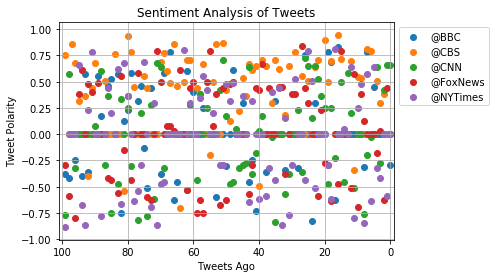

In [9]:
# media tweets graph
for user in target_users: # tried a loop since there are multiple variables
    news_df = news.loc[news["User"] == user]
    plt.scatter(news_df["Tweets Ago"], news_df["Compound"], label = user)
    plt.legend(bbox_to_anchor = (1,1)) # new legend placement!
plt.xlim(101, -1)

plt.grid()
plt.title("Sentiment Analysis of Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [10]:
# average sentiment
avg_sent = news.groupby("User")["Compound"].mean()
avg_sent

User
@BBC        0.033419
@CBS        0.353884
@CNN        0.006581
@FoxNews    0.034290
@NYTimes   -0.026123
Name: Compound, dtype: float64

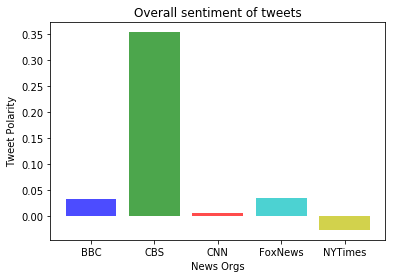

In [11]:
# overall sentiment graph
x = np.arange(len(avg_sent))
plt.bar(x, avg_sent, color = ["b", "g", "r", "c", "y"], alpha = 0.7, align = "edge")
xticks = [value+0.4 for value in x]
plt.xticks(xticks, ["BBC", "CBS", "CNN", "FoxNews", "NYTimes"])
plt.xlabel("News Orgs")
plt.ylabel("Tweet Polarity")
plt.title("Overall sentiment of tweets")
plt.savefig("overalltweets.png")
plt.show()